In [1]:
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fname = "cleaned_data.csv"
data = pd.read_csv(fname)
data.head()

,Latitude,Longitude,Date Local,24 Hour Local,Sample Duration,Horizontal Accuracy,State Code,County Code,Site Num,Year GMT,...,Reactive oxides of nitrogen (NOy),Relative Humidity,Solar radiation,Sulfate (TSP) STP,Sulfur dioxide,Total NMOC (non-methane organic compound),Wind Direction - Resultant,Wind Direction - Scalar,Wind Speed - Resultant,Wind Speed - Scalar
0,42.317372,-70.968359,2013-01-01,00:00,1 HOUR,15.18,25.0,25.0,41.0,2013.0,...,NaN,64.0,0.01,NaN,NaN,NaN,NaN,242.0,NaN,8.3
1,42.317372,-70.968359,2013-01-01,01:00,1 HOUR,15.18,25.0,25.0,41.0,2013.0,...,NaN,62.0,0.01,NaN,NaN,NaN,NaN,239.0,NaN,8.9
2,42.317372,-70.968359,2013-01-01,02:00,1 HOUR,15.18,25.0,25.0,41.0,2013.0,...,NaN,62.0,0.01,NaN,NaN,NaN,NaN,239.0,NaN,9.1
3,42.317372,-70.968359,2013-01-01,03:00,1 HOUR,15.18,25.0,25.0,41.0,2013.0,...,NaN,62.0,0.01,NaN,NaN,NaN,NaN,238.0,NaN,8.9
4,42.317372,-70.968359,2013-01-01,04:00,1 HOUR,15.18,25.0,25.0,41.0,2013.0,...,NaN,63.0,0.01,NaN,NaN,NaN,NaN,237.0,NaN,8.9


In [3]:
pd.set_option('display.max_columns', None)
data.columns
data.columns = ['Latitude', 'Longitude', 'Date Local', '24 Hour Local',
       'Sample Duration', 'Horizontal Accuracy', 'State Code', 'County Code',
       'Site Num', 'Year GMT', 'Day In Year GMT',
       'Acceptable PM2.5 AQI & Speciation Mass', 'Barometric pressure',
       'Black carbon PM2.5 STP', 'Carbon monoxide', 'Nitric oxide (NO)',
       'Nitrogen dioxide (NO2)', 'Outdoor Temperature',
       'Oxides of nitrogen (NOx)', 'Ozone', 'PM10 - LC',
       'PM10 Total 0-10um STP', 'PM10-2.5 - Local Conditions',
       'Reactive oxides of nitrogen (NOy)', 'Relative Humidity ',
       'Solar radiation', 'Sulfate (TSP) STP', 'Sulfur dioxide',
       'Total NMOC (non-methane organic compound)',
       'Wind Direction - Resultant', 'Wind Direction - Scalar',
       'Wind Speed - Resultant', 'Wind Speed - Scalar']

In [4]:
data["Date Local"] = pd.to_datetime(data["Date Local"])

In [5]:
d = data[["Acceptable PM2.5 AQI & Speciation Mass", "Year GMT"]]
d.columns = ["PM2.5", "Year GMT"]
d

,PM2.5,Year GMT
0,NaN,2013.0
1,NaN,2013.0
2,NaN,2013.0
3,NaN,2013.0
4,NaN,2013.0
5,NaN,2013.0
6,NaN,2013.0
7,NaN,2013.0
8,NaN,2013.0
9,NaN,2013.0


In [6]:
d = d.groupby(["Year GMT"], as_index=False).mean()
d.columns = ["Year", "PM2.5"]
d

,Year,PM2.5
0,2013.0,9.778329
1,2014.0,9.746021
2,2015.0,9.405967
3,2016.0,8.056017
4,2017.0,14.828094


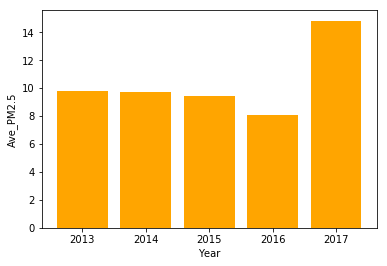

In [7]:
plt.bar(d["Year"], d["PM2.5"], color = "orange")
plt.xlabel("Year")
plt.ylabel("Ave_PM2.5")
plt.show()

In [8]:
d = data[["Acceptable PM2.5 AQI & Speciation Mass", "Date Local"]]
d.columns = ["PM2.5", "Date Local"]
d["Date Local"] = pd.to_datetime(d["Date Local"])
d["MONTH"] = d["Date Local"].dt.month
#d = d.groupby(["Month"], as_index=False).mean()
d

/Users/guangnanliang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/guangnanliang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PM2.5,Date Local,MONTH
0,NaN,2013-01-01,1
1,NaN,2013-01-01,1
2,NaN,2013-01-01,1
3,NaN,2013-01-01,1
4,NaN,2013-01-01,1
5,NaN,2013-01-01,1
6,NaN,2013-01-01,1
7,NaN,2013-01-01,1
8,NaN,2013-01-01,1
9,NaN,2013-01-01,1


In [9]:
td1 = d.loc[d['MONTH'] == 1]
td2 = d.loc[d['MONTH'] == 2]
td3 = d.loc[d['MONTH'] == 3]
td4 = d.loc[d['MONTH'] == 4]
td5 = d.loc[d['MONTH'] == 5]
td6 = d.loc[d['MONTH'] == 6]
td7 = d.loc[d['MONTH'] == 7]
td8 = d.loc[d['MONTH'] == 8]
td9 = d.loc[d['MONTH'] == 9]
td10 = d.loc[d['MONTH'] == 10]
td11 = d.loc[d['MONTH'] == 11]
td12 = d.loc[d['MONTH'] == 12]

In [10]:
td1 = td1[np.isfinite(td1['PM2.5'])]
td2 = td2[np.isfinite(td2['PM2.5'])]
td3 = td3[np.isfinite(td3['PM2.5'])]
td4 = td4[np.isfinite(td4['PM2.5'])]
td5 = td5[np.isfinite(td5['PM2.5'])]
td6 = td6[np.isfinite(td6['PM2.5'])]
td7 = td7[np.isfinite(td7['PM2.5'])]
td8 = td8[np.isfinite(td8['PM2.5'])]
td9 = td9[np.isfinite(td9['PM2.5'])]
td10 = td10[np.isfinite(td10['PM2.5'])]
td11 = td11[np.isfinite(td11['PM2.5'])]
td12 = td12[np.isfinite(td12['PM2.5'])]

td_plot = [td1['PM2.5'], td2['PM2.5'], td3['PM2.5'], td4['PM2.5'], td5['PM2.5'], td6['PM2.5'], 
           td7['PM2.5'], td8['PM2.5'], td9['PM2.5'], td10['PM2.5'], td11['PM2.5'], td12['PM2.5']]

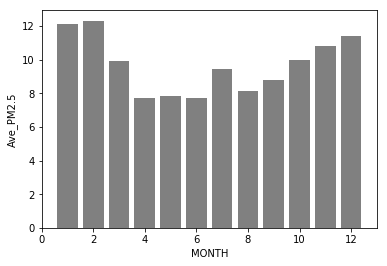

In [11]:
dl = d.groupby(["MONTH"], as_index=False).mean()
plt.bar(dl["MONTH"], dl["PM2.5"], color = "gray")
plt.xlabel("MONTH")
plt.ylabel("Ave_PM2.5")
plt.show()

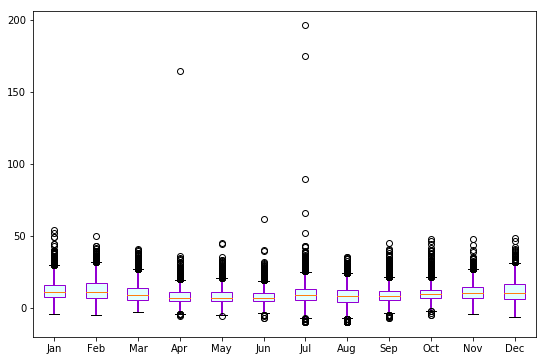

In [12]:
fig = plt.figure(2, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(td_plot, patch_artist = True)

# Change color
for box in bp['boxes']:
    box.set(color = '#9400D3', linewidth = 1)
    box.set(facecolor = '#E1FFFF')
    
for whisker in bp['whiskers']:
    whisker.set(color = '#9400D3', linewidth = 2)

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [13]:
d = data[["Ozone", "Year GMT"]]
d.columns = ["Ozone", "Year GMT"]
d

,Ozone,Year GMT
0,NaN,2013.0
1,NaN,2013.0
2,NaN,2013.0
3,NaN,2013.0
4,NaN,2013.0
5,NaN,2013.0
6,NaN,2013.0
7,NaN,2013.0
8,NaN,2013.0
9,NaN,2013.0


In [14]:
d = d.groupby(["Year GMT"], as_index=False).mean()
d.columns = ["Year", "Ozone"]
d

,Year,Ozone
0,2013.0,0.026681
1,2014.0,0.025662
2,2015.0,0.023153
3,2016.0,0.024398
4,2017.0,0.028129


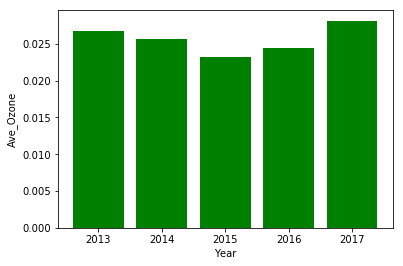

In [15]:
plt.bar(d["Year"], d["Ozone"], color = "green")
plt.xlabel("Year")
plt.ylabel("Ave_Ozone")
plt.show()

In [16]:
d = data[["Carbon monoxide", "Year GMT"]]
d.columns = ["Carbon monoxide", "Year GMT"]
d

,Carbon monoxide,Year GMT
0,NaN,2013.0
1,NaN,2013.0
2,NaN,2013.0
3,NaN,2013.0
4,NaN,2013.0
5,NaN,2013.0
6,NaN,2013.0
7,NaN,2013.0
8,NaN,2013.0
9,NaN,2013.0


In [17]:
d = d.groupby(["Year GMT"], as_index=False).mean()
d.columns = ["Year", "CO"]
d

,Year,CO
0,2013.0,0.298960
1,2014.0,0.304375
2,2015.0,0.297821
3,2016.0,0.274132
4,2017.0,0.249910


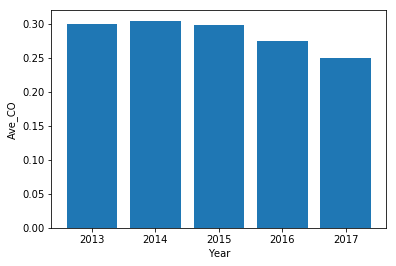

In [18]:
plt.bar(d["Year"], d["CO"])
plt.xlabel("Year")
plt.ylabel("Ave_CO")
plt.show()

In [19]:
d = data[["Nitric oxide (NO)", "Year GMT"]]
d.columns = ["Nitric oxide (NO)", "Year GMT"]
d

,Nitric oxide (NO),Year GMT
0,NaN,2013.0
1,NaN,2013.0
2,NaN,2013.0
3,NaN,2013.0
4,NaN,2013.0
5,NaN,2013.0
6,NaN,2013.0
7,NaN,2013.0
8,NaN,2013.0
9,NaN,2013.0


In [20]:
d = d.groupby(["Year GMT"], as_index=False).mean()
d.columns = ["Year", "NO"]
d

,Year,NO
0,2013.0,9.153493
1,2014.0,8.993731
2,2015.0,10.445803
3,2016.0,9.250811
4,2017.0,7.245977


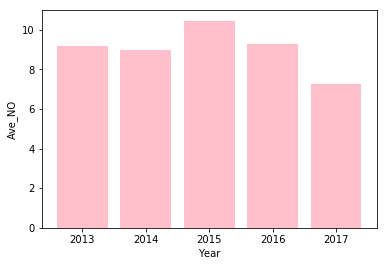

In [21]:
plt.bar(d["Year"], d["NO"], color = "pink")
plt.xlabel("Year")
plt.ylabel("Ave_NO")
plt.show()

In [22]:
d = data[["Nitrogen dioxide (NO2)", "Date Local", "Year GMT"]]
d.columns = ["Nitrogen dioxide (NO2)", "Date Local", "Year GMT"]
d

,Nitrogen dioxide (NO2),Date Local,Year GMT
0,NaN,2013-01-01,2013.0
1,NaN,2013-01-01,2013.0
2,NaN,2013-01-01,2013.0
3,NaN,2013-01-01,2013.0
4,NaN,2013-01-01,2013.0
5,NaN,2013-01-01,2013.0
6,NaN,2013-01-01,2013.0
7,NaN,2013-01-01,2013.0
8,NaN,2013-01-01,2013.0
9,NaN,2013-01-01,2013.0


In [23]:
d = d.groupby(["Date Local"], as_index=False).mean()
d.columns = ["Date", "NO2", "Year"]
d

,Date,NO2,Year
0,2013-01-01,11.691176,2013.0
1,2013-01-02,16.584615,2013.0
2,2013-01-03,24.361111,2013.0
3,2013-01-04,24.757143,2013.0
4,2013-01-05,21.085714,2013.0
5,2013-01-06,26.875000,2013.0
6,2013-01-07,24.714286,2013.0
7,2013-01-08,29.101695,2013.0
8,2013-01-09,32.880597,2013.0
9,2013-01-10,14.507246,2013.0


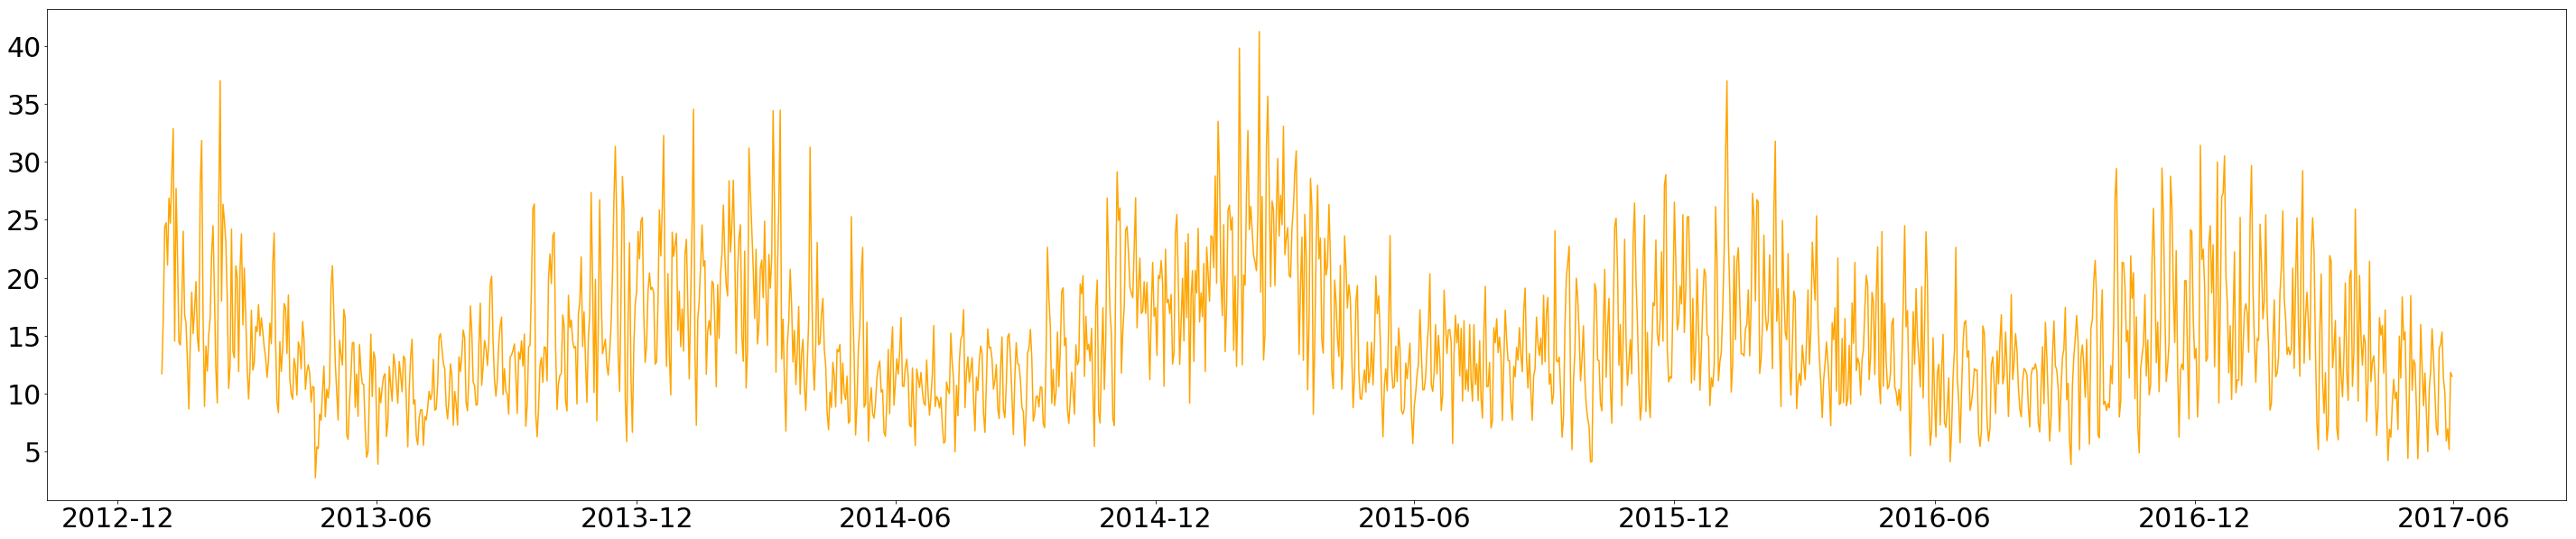

In [24]:
plt.figure(figsize=(50,10))
plt.plot(d["Date"], d["NO2"], color = "orange")
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()

In [25]:
d = data[["Ozone", "Outdoor Temperature", "Date Local"]]
d.columns = ["O3", "Outdoor Temperature", "Date Local"]
d

,O3,Outdoor Temperature,Date Local
0,NaN,34.0,2013-01-01
1,NaN,35.0,2013-01-01
2,NaN,35.0,2013-01-01
3,NaN,35.0,2013-01-01
4,NaN,35.0,2013-01-01
5,NaN,34.0,2013-01-01
6,NaN,34.0,2013-01-01
7,NaN,34.0,2013-01-01
8,NaN,35.0,2013-01-01
9,NaN,37.0,2013-01-01


In [26]:
d = d.groupby(["Date Local"], as_index=False).mean()
d.columns = ["Date", "O3", "Temperature"]
d

,Date,O3,Temperature
0,2013-01-01,0.022087,32.229167
1,2013-01-02,0.019500,22.416667
2,2013-01-03,0.012632,17.458333
3,2013-01-04,0.013042,30.500000
4,2013-01-05,0.017174,34.687500
5,2013-01-06,0.010125,35.520833
6,2013-01-07,0.010217,34.520833
7,2013-01-08,0.009542,37.833333
8,2013-01-09,0.004130,38.395833
9,2013-01-10,0.021792,42.062500


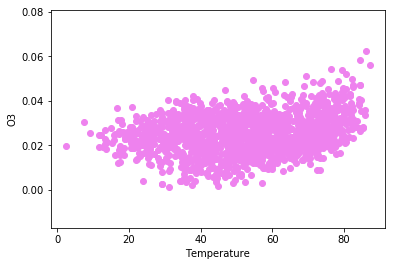

In [27]:
plt.scatter(d["Temperature"], d["O3"], c = "violet")
plt.xlabel("Temperature")
plt.ylabel("O3")
plt.show()

In [28]:
d = data[["Acceptable PM2.5 AQI & Speciation Mass", "Outdoor Temperature", "Date Local"]]
d.columns = ["PM2.5", "Outdoor Temperature", "Date Local"]
d

,PM2.5,Outdoor Temperature,Date Local
0,NaN,34.0,2013-01-01
1,NaN,35.0,2013-01-01
2,NaN,35.0,2013-01-01
3,NaN,35.0,2013-01-01
4,NaN,35.0,2013-01-01
5,NaN,34.0,2013-01-01
6,NaN,34.0,2013-01-01
7,NaN,34.0,2013-01-01
8,NaN,35.0,2013-01-01
9,NaN,37.0,2013-01-01


In [29]:
d = d.groupby(["Date Local"], as_index=False).mean()
d.columns = ["Date", "PM2.5", "Temperature"]
d

,Date,PM2.5,Temperature
0,2013-01-01,8.436735,32.229167
1,2013-01-02,7.208333,22.416667
2,2013-01-03,9.766667,17.458333
3,2013-01-04,16.564474,30.500000
4,2013-01-05,12.366667,34.687500
5,2013-01-06,21.572917,35.520833
6,2013-01-07,17.493878,34.520833
7,2013-01-08,18.555319,37.833333
8,2013-01-09,26.134043,38.395833
9,2013-01-10,6.014286,42.062500


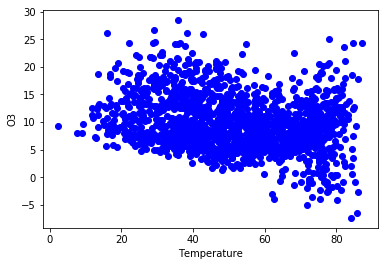

In [30]:
plt.scatter(d["Temperature"], d["PM2.5"], c = "blue")
plt.xlabel("Temperature")
plt.ylabel("O3")
plt.show()

In [31]:
d = data[["Acceptable PM2.5 AQI & Speciation Mass", "Wind Speed - Scalar", "Date Local"]]
d.columns = ["PM2.5", "Wind Speed - Scalar", "Date Local"]
d

,PM2.5,Wind Speed - Scalar,Date Local
0,NaN,8.3,2013-01-01
1,NaN,8.9,2013-01-01
2,NaN,9.1,2013-01-01
3,NaN,8.9,2013-01-01
4,NaN,8.9,2013-01-01
5,NaN,10.0,2013-01-01
6,NaN,9.9,2013-01-01
7,NaN,9.6,2013-01-01
8,NaN,13.1,2013-01-01
9,NaN,18.1,2013-01-01


In [32]:
d = d.groupby(["Date Local"], as_index=False).mean()
d.columns = ["Date", "PM2.5", "Wind Speed - Scalar"]
d

,Date,PM2.5,Wind Speed - Scalar
0,2013-01-01,8.436735,9.619444
1,2013-01-02,7.208333,9.288889
2,2013-01-03,9.766667,7.175000
3,2013-01-04,16.564474,7.040278
4,2013-01-05,12.366667,6.034722
5,2013-01-06,21.572917,5.025000
6,2013-01-07,17.493878,5.080556
7,2013-01-08,18.555319,6.409859
8,2013-01-09,26.134043,4.970149
9,2013-01-10,6.014286,10.429167


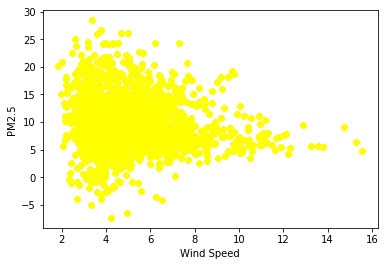

In [33]:
plt.scatter(d["Wind Speed - Scalar"], d["PM2.5"], c = "yellow")
plt.xlabel("Wind Speed")
plt.ylabel("PM2.5")
plt.show()